# Some stay, but some never do...

Every year, companies spend billions on employees - whether for salaries, training and development, and other financial/ non-financial profits; thus it makes for companies to be able to have a model that can predict who they should hire. The goal is to build a model that can identify certain traits of people who have a short tenure, and companies later on can use the model for recruitment or talent management purposes.

The model is built using on HR data obtained on Kaggle. The explanatory variable will include Sex, Age, Pay Rate, Marital Status, Race, and Performance Score, as these traits can be observed rather easily and can have some effects of people's decisions to leave a firm.

![ByeUrl](https://media.giphy.com/media/6v4VaKAwgmLoA/giphy.gif "bye")

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('core_dataset.csv')

#### Now gather some general information and take a sample of 5 datapoints to get an quick overview of data set.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee Name        301 non-null    object 
 1   Employee Number      301 non-null    float64
 2   State                301 non-null    object 
 3   Zip                  301 non-null    float64
 4   DOB                  301 non-null    object 
 5   Age                  301 non-null    float64
 6   Sex                  301 non-null    object 
 7   MaritalDesc          301 non-null    object 
 8   CitizenDesc          301 non-null    object 
 9   Hispanic/Latino      301 non-null    object 
 10  RaceDesc             301 non-null    object 
 11  Date of Hire         301 non-null    object 
 12  Date of Termination  103 non-null    object 
 13  Reason For Term      301 non-null    object 
 14  Employment Status    301 non-null    object 
 15  Department           301 non-null    obj

In [4]:
data.sample(5)

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
280,"Ozark, Travis",8.120118e+08,NC,27229.0,5/19/1982,35.0,Male,Single,US Citizen,No,...,1/5/2015,NaN,N/A - still employed,Active,Sales,Area Sales Manager,55.0,John Smith,Website Banner Ads,90-day meets
238,"Miller, Ned",1.205033e+09,MA,2472.0,6/29/1985,32.0,Male,Single,US Citizen,No,...,8/15/2011,9/4/2014,unhappy,Voluntarily Terminated,Production,Production Technician II,25.0,Brannon Miller,MBTA ads,PIP
217,"Fitzpatrick, Michael J",1.109029e+09,MA,2143.0,10/1/1981,36.0,Male,Single,US Citizen,Yes,...,5/16/2011,6/24/2013,hours,Voluntarily Terminated,Production,Production Technician II,29.0,Amy Dunn,Social Networks - Facebook Twitter etc,Fully Meets
269,"Givens, Myriam",1.203032e+09,IN,46204.0,9/22/1989,28.0,Female,Single,US Citizen,No,...,2/16/2015,NaN,N/A - still employed,Active,Sales,Area Sales Manager,55.0,Lynn Daneault,Pay Per Click - Google,90-day meets
109,"Fidelia, Libby",1.006020e+09,MA,2155.0,3/16/1981,36.0,Female,Married,US Citizen,No,...,1/9/2012,NaN,N/A - still employed,Active,Production,Production Technician I,24.0,Brannon Miller,Social Networks - Facebook Twitter etc,Fully Meets


As you can see, there are a lot of variables in the dataset, some of which will either be transformed or deleted later when we build our model. For now, we will learn more about the data set to see if any pre-processed correction is necessary.

#### Let's review some categorical variables:

In [5]:
print("Sex: \n" + str(data.Sex.value_counts()))
print("Marital status categories: \n" + str(data.MaritalDesc.value_counts()))
print("\nRace status categories: \n" + str(data.RaceDesc.value_counts()))
print("\nReason for termination categories: \n" + str(data['Reason For Term'].value_counts()))
print("\nEmployment status categories: \n" + str(data['Employment Status'].value_counts()))
print("\nPerformance score status: \n" + str(data['Performance Score'].value_counts()))

Sex: 
Female    174
Male      126
male        1
Name: Sex, dtype: int64
Marital status categories: 
Single       127
Married      119
Divorced      30
Separated     14
widowed       11
Name: MaritalDesc, dtype: int64

Race status categories: 
White                               190
Black or African American            54
Asian                                31
Two or more races                    18
American Indian or Alaska Native      4
Hispanic                              4
Name: RaceDesc, dtype: int64

Reason for termination categories: 
N/A - still employed                188
Another position                     20
unhappy                              14
N/A - Has not started yet            11
more money                           11
career change                         9
hours                                 9
attendance                            7
relocation out of area                5
return to school                      5
retiring                              4
military   

We are not very interested in employees who have yet to start and employees who have not had their performance evaluated, so we are dropping them from the data set.

#### Drop employees who have not started yet and employees whose performance haven't been reviewed.

In [6]:
data = data[data['Employment Status'] != "Future Start"]
print("\nEmployment status categories: \n" + str(data['Employment Status'].value_counts()))
data = data[data['Performance Score'] != "N/A- too early to review"]
print("\nPerformance score status: \n" + str(data['Performance Score'].value_counts()))


Employment status categories: 
Active                    174
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Name: Employment Status, dtype: int64

Performance score status: 
Fully Meets          172
90-day meets          31
Exceeds               26
Needs Improvement     15
PIP                    9
Exceptional            9
Name: Performance Score, dtype: int64


There is one data point where "Male" was stored incorrectly as "male", so we will go ahead and clean that up.

#### Further cleaning...

In [7]:
data.loc[data['Sex'] == "male", 'Sex'] = "Male"

## 2. Explore the data set

Building models is fun, but so are exploring the data set and gaining some new insights. Who knows - we may leave this with bite-sized knowledge that can serve as conversation openers :)

#### Sex vs Performance Score

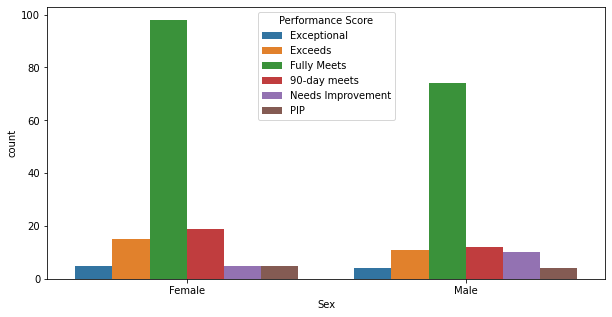

In [8]:
plt.figure(figsize=(10, 5))
plt.ylabel('%')
sns.countplot(x='Sex', hue='Performance Score', data=data, hue_order = ('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets', 'Needs Improvement', 'PIP'))
plt.show()

There is no distinguishable difference between the performance score distributions of Male and Female employees - they both are mostly distributed at the Fully Meets evaluation - the distributions make sense in terms of performance evaluation and talent management.

![OK](https://media.giphy.com/media/kg6bayFcFEeYNklQY4/giphy.gif "OK")

#### Age vs Pay rate

<Figure size 720x360 with 0 Axes>

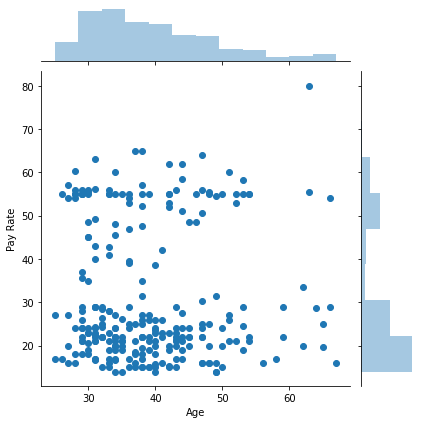

In [9]:
plt.figure(figsize=(10, 5))
sns.jointplot(x='Age',y='Pay Rate',data=data)
plt.show()

No clear relationship between Age and Pay Rate exists. Age usually captures experience and/ or tenure (though not perfectly), and the graph could be intepreted as experience and/ or tenure do not impact pay as much as conventionally thought. Companies are probably switching to pay by other factors, such as results and competency.

What's the point of not retiring early again??

![aging](https://media.giphy.com/media/Nt8Q1I8rlfzZS/giphy.gif "aged")

#### Sex and Pay Rate

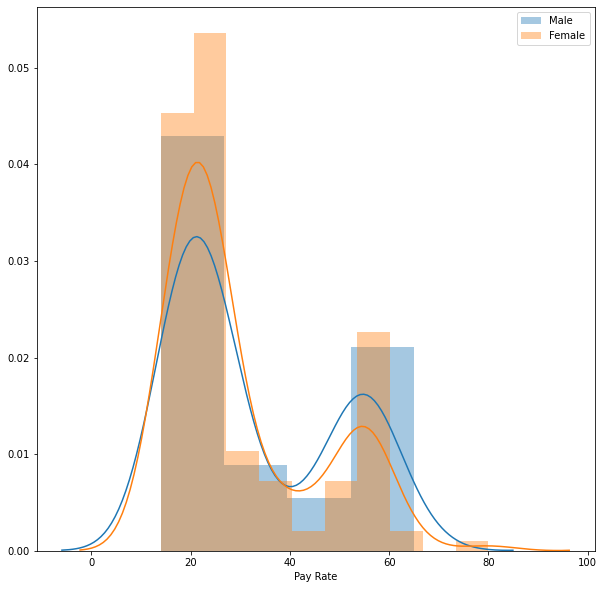

In [10]:
plt.figure(figsize=(10, 10))
sns.distplot(data[data['Sex'] == "Male"]['Pay Rate'], label='Male')
sns.distplot(data[data['Sex'] == "Female"]['Pay Rate'], label='Female')
plt.legend()
plt.show()

Female employees seem to have higher pay rates than their male counterparts when they are around 18 - 35 years old, and see their pay rates lower than their male colleagues when they reach 35+.

There really is no good answer to this trend particularly - one could perhaps suspect that females could only reach the middle management levels and stay there, while males could reach upper management levels and hence males' compensation rates are higher when they are older.

![WOW](https://media.giphy.com/media/2cizFyS72nkQg/giphy.gif "wow")

## 3. Build Models

Now we have reached the pièce de résistance - sorry for keeping you waiting, but good things always take some time...

We will first need to transform our categorical variables so as to feed into the models.

#### Some data processing...

In [11]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data = pd.get_dummies(data, columns=['RaceDesc'], drop_first=True)
data = pd.get_dummies(data, columns=['Performance Score'], drop_first=True)
data = pd.get_dummies(data, columns=['MaritalDesc'], drop_first=True)
data.loc[data['Employment Status'] == "Active", 'Employment'] = 1
data.loc[data['Employment Status'] != "Active", 'Employment'] = 0
data.loc[data['Employment Status'] == "Leave of Absence", 'Employment'] = 1

print(data.info())
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 301
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employee Name                        262 non-null    object 
 1   Employee Number                      262 non-null    float64
 2   State                                262 non-null    object 
 3   Zip                                  262 non-null    float64
 4   DOB                                  262 non-null    object 
 5   Age                                  262 non-null    float64
 6   CitizenDesc                          262 non-null    object 
 7   Hispanic/Latino                      262 non-null    object 
 8   Date of Hire                         262 non-null    object 
 9   Date of Termination                  89 non-null     object 
 10  Reason For Term                      262 non-null    object 
 11  Employment Status               

,Employee Name,Employee Number,State,Zip,DOB,Age,CitizenDesc,Hispanic/Latino,Date of Hire,Date of Termination,...,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_Needs Improvement,Performance Score_PIP,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_widowed,Employment
162,"Perry, Shakira",1.109029e+09,MA,2176.0,7/20/1986,31.0,US Citizen,No,5/16/2011,10/25/2015,...,0,0,1,0,0,0,0,1,0,0.0
284,"Terry, Sharlene",1.401065e+09,OR,97756.0,5/7/1965,52.0,US Citizen,No,9/29/2014,NaN,...,0,0,1,0,0,0,0,1,0,1.0
262,"Carter, Michelle",1.403066e+09,VT,5664.0,5/15/1963,54.0,US Citizen,No,8/18/2014,NaN,...,0,0,1,0,0,0,0,1,0,1.0
55,"Butler, Webster L",1.110030e+09,MA,2169.0,8/9/1983,34.0,US Citizen,No,1/28/2016,NaN,...,1,0,0,0,0,0,0,1,0,1.0
272,Jeremy Prater,1.001085e+09,NV,89139.0,5/9/1974,43.0,US Citizen,No,5/12/2014,NaN,...,0,0,0,0,1,1,0,0,0,1.0


Then, we need to set appropriate values to our variables.

#### Set values to X and y.

In [12]:
y = data.iloc[:, -1].values
X = data.iloc[:, [5, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]].values

print(sum(np.isnan(y)))
print(sum(np.isnan(X)))

0
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Our X data has some missing values, which we will fill by using mean of repective column. 

#### Set null values to mean of columns.

In [13]:
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

For our last step before building models, we will split the data set into testing and training sets.

#### Split data into testing and training sets.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

After processing and splitting our data set, it is time to deep-dive into several models to see which one we should recommend to the interested companies.

### 3.1 Logistic Model

We will first explore logistic modelling. Logistic models work wonderfully when the dependent variable takes on binary values, which is the case here as employees either stay or have left.

#### Building the Logistic Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/bi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
predictions = logmodel.predict(X_test)

After building the Logistic Model, we can proceed to assess how good this model is by seeing its Accuracy and Precision scores.

#### Accuracy and Precision scores of the Logistic Model

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, average='weighted'))

Accuracy:  0.6363636363636364
Precision:  0.5834710743801653


The Accuracy and Precision scores are not wildly high, but the model has quite a good balance between the 2 metrics. We can keep this one in mind.

#### Heatmap

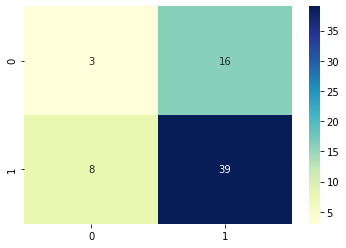

In [19]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

### 3.2 Random Forest Model

Random Forest is one of the most effective and versatile modelling techniques - so it makes sense to explore this option for our modelling task.

#### Building the Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

As with the Logistic Model, we will assess the Accuracy and Precision scores of the Random Forest Model.

#### Accuracy and Precision scores of the Random Forest Model

In [25]:
predictions_rfc = rfc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions_rfc))
print("Precision: ", precision_score(y_test, predictions_rfc, average='weighted'))

Accuracy:  0.7272727272727273
Precision:  0.7120617944147355


We see big improvement in both the Accuracy and Precision scores from those of the Logistic Model. If we have to choose between the two models, the Random Forest Model wins by all metrics.

#### Heatmap

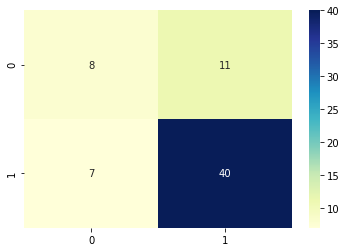

In [26]:
sns.heatmap(confusion_matrix(y_test, predictions_rfc), cmap="YlGnBu", annot=True, fmt="d")

### 3.3 Decision Tree Model

Decision Tree is another modelling technique that could be applicable to our modelling task, with a binary dependent variable.

#### Building the Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Again, we are interested in the Accuracy and Precision scores of the model.

#### Accuracy and Precision scores of the Decision Tree Model

In [29]:
predictions_dtc = dtc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions_dtc))
print("Precision: ", precision_score(y_test, predictions_dtc, average='weighted'))

Accuracy:  0.6666666666666666
Precision:  0.688237276710482


Both the Accuracy and Precision scores are not too different from those of the Random Forest Model.

#### Heatmap

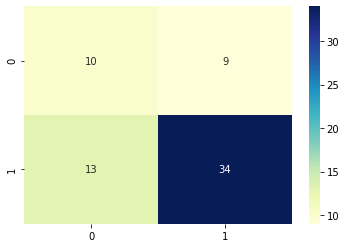

In [30]:
sns.heatmap(confusion_matrix(y_test, predictions_dtc), cmap="YlGnBu", annot=True, fmt="d")

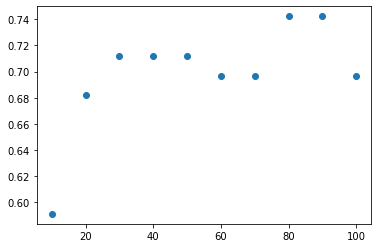

In [31]:
n = [10,20,30,40,50,60,70,80,90,100]

result = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))
    
plt.scatter(n, result)

## 4. Conclusion

Both Random Forest and Decision Tree models produce fantastic metrics for our model assessment task, and thus we can recommend these two to companies who would like to predict whether a prospective or existing employee will leave the company soon or not.

Moving forward, I would like to perhaps introduce some other variables not yet present here, such as relative positions within the firm (e.g. entry level, junior management, etc.) or departments (e.g. marketing, HR, sales, etc.) to make the models even more robust, accurate, and precise.

![WOOHOO](https://media.giphy.com/media/L0O3TQpp0WnSXmxV8p/giphy.gif "woohoo")